In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
file_path = 'data_cleaned_Cardio_Data.csv'  
data = pd.read_csv(file_path)

In [3]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,4


In [4]:
X = data.drop(columns=['bp_category_encoded'])  
y = data['bp_category_encoded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

In [8]:
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)
lr_class_report = classification_report(y_test, lr_y_pred)

In [9]:
print(f"Accuracy: {lr_accuracy * 100:.2f}%")

Accuracy: 77.18%


In [10]:
print("Confusion Matrix:")
print(lr_conf_matrix)

Confusion Matrix:
[[  856  1016     0     1   287]
 [  333 11981   282   691   361]
 [   13   355  3011   298     0]
 [  133  1611   429  2022     8]
 [   22   467     0     0  3464]]


In [11]:
print("Classification Report:")
print(lr_class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.40      0.49      2160
           1       0.78      0.88      0.82     13648
           2       0.81      0.82      0.81      3677
           3       0.67      0.48      0.56      4203
           4       0.84      0.88      0.86      3953

    accuracy                           0.77     27641
   macro avg       0.75      0.69      0.71     27641
weighted avg       0.76      0.77      0.76     27641



In [13]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [14]:
print("Decision Tree Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classifier:
Confusion Matrix:
 [[ 2160     0     0     0     0]
 [    0 13575     0    73     0]
 [    0     0  3630    47     0]
 [    0    75    49  4079     0]
 [    0     0     0     0  3953]]


In [15]:
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))

Accuracy:  0.9911725335552259


In [16]:
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2160
           1       0.99      0.99      0.99     13648
           2       0.99      0.99      0.99      3677
           3       0.97      0.97      0.97      4203
           4       1.00      1.00      1.00      3953

    accuracy                           0.99     27641
   macro avg       0.99      0.99      0.99     27641
weighted avg       0.99      0.99      0.99     27641



In [18]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [19]:
print("Random Forest Classifier:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier:
Confusion Matrix:
 [[ 2160     0     0     0     0]
 [    0 13592     0    56     0]
 [    0     1  3610    66     0]
 [    0    50    13  4140     0]
 [    0     0     0     0  3953]]


In [20]:
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))

Accuracy:  0.9932708657429181


In [21]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2160
           1       1.00      1.00      1.00     13648
           2       1.00      0.98      0.99      3677
           3       0.97      0.99      0.98      4203
           4       1.00      1.00      1.00      3953

    accuracy                           0.99     27641
   macro avg       0.99      0.99      0.99     27641
weighted avg       0.99      0.99      0.99     27641



In [23]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [24]:
print("Support Vector Machine (SVM):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Support Vector Machine (SVM):
Confusion Matrix:
 [[ 1712   437     1     0    10]
 [   85 13161   148   232    22]
 [    0   261  3208   208     0]
 [    0   411   173  3619     0]
 [  103   108     0     0  3742]]


In [25]:
print("Accuracy: ", accuracy_score(y_test, y_pred_svm))

Accuracy:  0.920444267573532


In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      2160
           1       0.92      0.96      0.94     13648
           2       0.91      0.87      0.89      3677
           3       0.89      0.86      0.88      4203
           4       0.99      0.95      0.97      3953

    accuracy                           0.92     27641
   macro avg       0.92      0.89      0.90     27641
weighted avg       0.92      0.92      0.92     27641



In [28]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [29]:
print("K-Nearest Neighbors (KNN):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors (KNN):
Confusion Matrix:
 [[ 1128   824     0     3   205]
 [  555 12481   190   308   114]
 [    4   388  3049   236     0]
 [   50  1715   244  2194     0]
 [  363   619     0     0  2971]]


In [30]:
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))

Accuracy:  0.7895155746897724


In [31]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.52      0.53      2160
           1       0.78      0.91      0.84     13648
           2       0.88      0.83      0.85      3677
           3       0.80      0.52      0.63      4203
           4       0.90      0.75      0.82      3953

    accuracy                           0.79     27641
   macro avg       0.78      0.71      0.73     27641
weighted avg       0.79      0.79      0.78     27641



In [ ]:
accuracy_results = {
    "Logistic Regression": lr_accuracy * 100,
    "Decision Tree": accuracy_score(y_test, y_pred_dt) * 100,
    "Random Forest": accuracy_score(y_test, y_pred_rf) * 100,
    "SVM": accuracy_score(y_test, y_pred_svm) * 100,
    "KNN": accuracy_score(y_test, y_pred_knn) * 100,
}

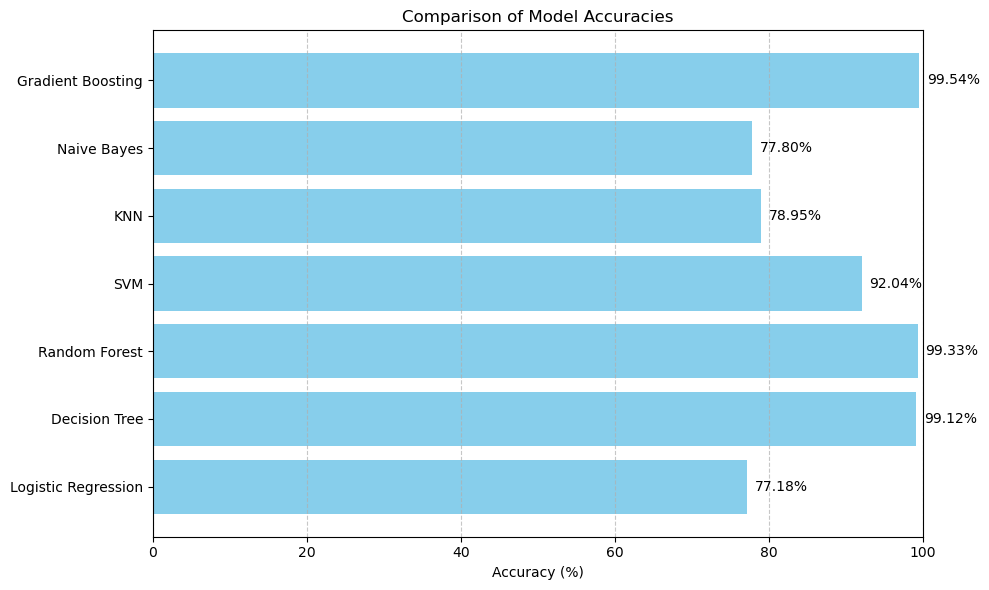

In [48]:
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 100)  
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(accuracy_results.values()):
    plt.text(value + 1, index, f"{value:.2f}%", va='center')

plt.tight_layout()
plt.show()